# Capstone Project: Battle of the Neighborhoods

## Neighbourhoods of Nairobi


### Table Of Content:
#### 1) Introduction
#### 2) Business Problem
#### 3) Data Acqusition & Preprocessing
#### 4) Methodology
#### 5) Results and Discussion
#### 6) Conclusion


## Introduction

Nairobi is the capital of Kenya, which is located in Africa. In addition to being the capital, Nairobi is also the country’s largest city by population. The last official population was taken in 2009 and at that time was 3,138,369 in the city proper. That number has since grown to approximately 3.5 million. The metro area has over 6.5 million residents. This “Green City In The Sun” has a history dating back to 1899 and continues to grow as rural residents make their way to this big city for employment opportunities

Nairobi's 2020 population is now estimated at 4,734,881. In 1950, the population of Nairobi was 137,456. Nairobi has grown by 821,369 since 2015, which represents a 3.88% annual change. These population estimates and projections come from the latest revision of the UN World Urbanization Prospects. These estimates represent the Urban agglomeration of Nairobi, which typically includes Nairobi's population in addition to adjacent suburban areas.

The city of Nairobi is growing consistently and currently stretches over an area of of 696 kilometers squared (269 square miles). This area size - in combination with the total number of residents - brings us the current population density which is now approximately 4,850 residents per square kilometer. (12,600 people living per square mile).

### Business Problem

Nine million individuals are expected to enter the labor force in a decade between 2015 and 2025, further pushing up the country’s unemployment rate which stood at 9.3% in 2017

 According to the Kenya Economic Survey 2019,  840,600 new jobs were created in 2018 compared to 909,800 reported in 2017.

Kenya has to create at least 900,000 jobs annually between 2019 and 2025 to absorb the high number of youths joining the job market, according to the latest World Bank report

The ten year World Bank  survey projects unemployment rate in Kenya was to rise to 10.5 per cent in 2019 before slowing to 10 per cent in 2020

##### The core objective is to establish businesses that will create Jobs -  especially for the youth specifically in Nairobi, seeing that a large percentage of Nairobi’s population seem to be youthful. These businesses, also, need to be the type that appeal and build spending habits to customers of a young age, particularly from the teenage years to the late youth.

## Data Acquisition and Preprocessing
Data of Nairobi’s Neighbourhoods was obtained/scraped from https://en.wikipedia.org/wiki/Category:Suburbs_of_Nairobi and formatted into a pandas Data Frame.

Population Information, Visualizations and CSV file was obtained from Nairobi Population 2020 (Demographics, Maps, Graphs), and Nairobi (County, Kenya) - Population Statistics, Charts, Map and Location.

Geocoding: Nominatim Geocoding service, which is built on top of OpenStreetMap data, was used to find the latitudinal and longitudinal values of Nairobi’s neighborhoods. Unfortunately, not all neighborhoods could be mapped because the process of converting their addresses to coordinates was somewhat limited by the Geocoder.

Folium: This builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. The library has a number of built-in tile sets from OpenStreetMap

Foursquare Developers Access to venue data: https://foursquare.com/


In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

%matplotlib inline

## Data Reading, Preprocessing, and Analysis

In [2]:
data = pd.read_csv('Neighborhoods of Nairobi.csv')
data.head()

,Neighborhood
0,B
1,"Bahati, Nairobi"
2,Buruburu
3,D
4,Dagoretti


In [3]:
print(data['Neighborhood'].unique())
print(data.shape)

['B' 'Bahati, Nairobi' 'Buruburu' 'D' 'Dagoretti' 'Dandora' 'E'
 'Eastleigh, Nairobi' 'Embakasi' 'G' 'Gatwekera' 'Gigiri' 'Githurai' 'H'
 'Highridge' 'Huruma' 'J' 'Jericho, Nairobi' 'K' 'Kambi Muru' 'Kamulu'
 'Kangemi' 'Karen, Kenya' 'Kariobangi' 'Kasarani' 'Kawangware' 'Kiambiu'
 'Kibera' 'Kichinjio' 'Kilimani' 'Kisumu Ndogo' 'Kitisuru' 'Korogocho' 'L'
 'Laini Saba' "Lang'ata" 'Lavington, Nairobi' 'Lindi, Nairobi'
 'Lucky Summer Estate' 'M' 'Madaraka Estate' 'Majengo, Nairobi'
 'Makongeni' 'Mashimoni' 'Mathare' 'Mathare Valley' 'Matopeni' 'Mugumoini'
 'Muirigo' 'Mukuru kwa Njenga' 'O' 'Ofafa' 'P' 'Pangani, Nairobi'
 'Parklands, Nairobi' 'Pumwani' 'R' 'Raila' 'Runda' 'S' "Sarang'ombe"
 'Shilanga' 'Siranga' 'South B' 'South C' 'Soweto East' 'Soweto West'
 'Syokimau' 'U' 'Upper Hill, Nairobi' 'Uthiru' 'W' 'Westlands, Nairobi']
(73, 1)


###  Cleaning 

In [4]:
data[data['Neighborhood'].isin(['B','D','E','G','H','J','K','L','M','O','P','R','S','U','W'])]

,Neighborhood
0,B
3,D
6,E
9,G
13,H
16,J
18,K
33,L
39,M
50,O


In [5]:
data.drop([0,3,6,9,13,16,18,33,39,50,52,56,59,68,71], inplace=True)

In [6]:
print(data['Neighborhood'].unique())
print(data.shape)

['Bahati, Nairobi' 'Buruburu' 'Dagoretti' 'Dandora' 'Eastleigh, Nairobi'
 'Embakasi' 'Gatwekera' 'Gigiri' 'Githurai' 'Highridge' 'Huruma'
 'Jericho, Nairobi' 'Kambi Muru' 'Kamulu' 'Kangemi' 'Karen, Kenya'
 'Kariobangi' 'Kasarani' 'Kawangware' 'Kiambiu' 'Kibera' 'Kichinjio'
 'Kilimani' 'Kisumu Ndogo' 'Kitisuru' 'Korogocho' 'Laini Saba' "Lang'ata"
 'Lavington, Nairobi' 'Lindi, Nairobi' 'Lucky Summer Estate'
 'Madaraka Estate' 'Majengo, Nairobi' 'Makongeni' 'Mashimoni' 'Mathare'
 'Mathare Valley' 'Matopeni' 'Mugumoini' 'Muirigo' 'Mukuru kwa Njenga'
 'Ofafa' 'Pangani, Nairobi' 'Parklands, Nairobi' 'Pumwani' 'Raila' 'Runda'
 "Sarang'ombe" 'Shilanga' 'Siranga' 'South B' 'South C' 'Soweto East'
 'Soweto West' 'Syokimau' 'Upper Hill, Nairobi' 'Uthiru'
 'Westlands, Nairobi']
(58, 1)


In [7]:
geolocator = Nominatim(user_agent='my-application')

In [8]:
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
data['location'] = data['Neighborhood'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
data['point'] = data['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
data[['latitude', 'longitude','altitude']] = pd.DataFrame(data['point'].tolist(), index=data.index)

In [9]:
data.head()

,Neighborhood,location,point,latitude,longitude,altitude
1,"Bahati, Nairobi","(Bahati, Chahafi, Kisoro, Western Region, Ugan...","(-1.3, 29.766667, 0.0)",-1.300000,29.766667,0.0
2,Buruburu,"(Buruburu, Amolatar, Northern Region, Uganda, ...","(1.766667, 32.8, 0.0)",1.766667,32.800000,0.0
4,Dagoretti,"(Dagoretti, Dagoretti Road, Kabiria, Nairobi, ...","(-1.2896931, 36.6849829, 0.0)",-1.289693,36.684983,0.0
5,Dandora,"(Dandora, Salamat سلامات, Tchad / تشاد, (11.08...","(11.0857, 20.3518667, 0.0)",11.085700,20.351867,0.0
7,"Eastleigh, Nairobi","(Eastleigh, Nairobi, 00611, Kenya, (-1.2778285...","(-1.2778285, 36.8486835, 0.0)",-1.277829,36.848683,0.0


In [10]:
data.drop(['location','point','altitude'], axis=1, inplace = True)
print(data.shape)

(58, 3)


In [12]:
data.head()

,Neighborhood,latitude,longitude
1,"Bahati, Nairobi",-1.300000,29.766667
2,Buruburu,1.766667,32.800000
4,Dagoretti,-1.289693,36.684983
5,Dandora,11.085700,20.351867
7,"Eastleigh, Nairobi",-1.277829,36.848683


In [13]:
data.describe()

,latitude,longitude
count,54.000000,54.000000
mean,6.401238,29.342053
std,18.358023,26.535166
min,-6.183337,-114.133333
25%,-1.312179,36.708320
50%,-1.273706,36.787480
75%,-1.207345,36.845998
max,57.747092,49.000320


### Displaying coordinates in order to classify which ones can be outliers

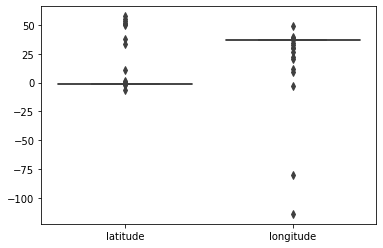

In [14]:
sns.boxplot(data=data)
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1 to 72
Data columns (total 3 columns):
Neighborhood    58 non-null object
latitude        54 non-null float64
longitude       54 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


### Checking for any null coordinate values

In [16]:
data.isnull().any()

Neighborhood    False
latitude         True
longitude        True
dtype: bool

In [17]:
nan_coordinates = data[data.isnull().any(axis=1)]

In [18]:
nan_coordinates

,Neighborhood,latitude,longitude
26,Kiambiu,NaN,NaN
38,Lucky Summer Estate,NaN,NaN
48,Muirigo,NaN,NaN
49,Mukuru kwa Njenga,NaN,NaN


### Filtering out null values, and outliers (outliers are those whose latitudinal and longitudinal values are either too high or too low to be the true coordinates of their perspective neighbourhoods) 

In [19]:
odd_values = data.loc[[5,14,15,26,27,29,38,48,49,57,61,62,64,69],] #Include Null Coordinates
odd_values.reset_index(drop=True, inplace=True)
odd_values.head()

,Neighborhood,latitude,longitude
0,Dandora,11.085700,20.351867
1,Highridge,54.033333,-114.133333
2,Huruma,51.362249,9.469233
3,Kiambiu,NaN,NaN
4,Kibera,57.747092,26.988900


In [20]:
odd_values = odd_values.set_index('Neighborhood')

#### Renaming these null values by including the country in which the neighbourhood is located i.e. Kenya. this should aid in providing better/accurate location data 

In [21]:
odd_values.rename(index={'Dandora':'Dandora,Kenya', 'Highridge':'Highridge,Kenya','Huruma':'Huruma,Kenya',
                        'Kiambiu':'Kiambiu,Kenya','Kibera':'Kibera,Kenya','Kilimani':'Kilimani,Kenya',
                         'Lucky Summer Estate':'Lucky Summer,Kenya','Muirigo':'Muirigo,Kenya','Mukuru kwa Njenga':'Mukuru kwa Njenga,Kenya',
                        'Raila':'Raila,Kenya','Shilanga':'Shilanga,Kenya','Siranga':'Siranga,Kenya','South C':'South C,Kenya',
                        'Upper Hill, Nairobi':'Upper Hill, Kenya'}, inplace=True)

In [22]:
odd_values.reset_index(inplace=True)

#### Dropping the initial incorrect latitudinal and longitudinal values and usuing Geolocater's Nomatim to re-value the new locations of the neighbourhoods

In [23]:
odd_values.drop(['latitude','longitude'], axis=1, inplace=True)
odd_values.shape

(14, 1)

In [24]:
odd_values['location'] = odd_values['Neighborhood'].apply(geocode)
odd_values['point'] = odd_values['location'].apply(lambda loc: tuple(loc.point) if loc else None)
odd_values[['latitude', 'longitude','altitude']] = pd.DataFrame(odd_values['point'].tolist(), index=odd_values.index)

In [25]:
odd_values.drop(['point','location','altitude'],axis=1,inplace=True)
odd_values.shape

(14, 3)

In [26]:
odd_values.head()

,Neighborhood,latitude,longitude
0,"Dandora,Kenya",-1.249073,36.896289
1,"Highridge,Kenya",54.033333,-114.133333
2,"Huruma,Kenya",51.362249,9.469233
3,"Kiambiu,Kenya",NaN,NaN
4,"Kibera,Kenya",-1.314787,36.799647
5,"Kilimani,Kenya",-1.287442,36.784523
6,"Lucky Summer,Kenya",-1.239308,36.898786
7,"Muirigo,Kenya",NaN,NaN
8,"Mukuru kwa Njenga,Kenya",NaN,NaN
9,"Raila,Kenya",-1.318348,36.779293


#### 7 neighbourhoods had a successful reassignment of their locations, but the other 7 did not and therefore had to be dropped because it would lessen the accuracy when it comes to clustering the neighbourhoods.

In [27]:
cleaned_data = odd_values.drop(index=[1,2,3,7,8,10,13])
cleaned_data.shape

(7, 3)

In [28]:
cleaned_data.head()

,Neighborhood,latitude,longitude
0,"Dandora,Kenya",-1.249073,36.896289
4,"Kibera,Kenya",-1.314787,36.799647
5,"Kilimani,Kenya",-1.287442,36.784523
6,"Lucky Summer,Kenya",-1.239308,36.898786
9,"Raila,Kenya",-1.318348,36.779293
11,"Siranga,Kenya",0.230146,34.231529
12,"South C,Kenya",-1.320401,36.830525


##### Creating a subset of the  neighbourhood data that had no issues from the very beggining, and appending the 'cleaned_data' to  this dataframe

In [29]:
data2 = data.drop([5,14,15,26,27,29,38,48,49,57,61,62,64,69])
data2.shape

(44, 3)

In [30]:
data_filt = data2.append(cleaned_data)

In [31]:
print(data.info())
print(data_filt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1 to 72
Data columns (total 3 columns):
Neighborhood    58 non-null object
latitude        54 non-null float64
longitude       54 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 12
Data columns (total 3 columns):
Neighborhood    51 non-null object
latitude        51 non-null float64
longitude       51 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB
None


In [32]:
print(data.shape)
print(data2.shape)
print(data_filt.shape)

(58, 3)
(44, 3)
(51, 3)


In [33]:
data_filt.sort_values(by='Neighborhood', inplace=True)
data_filt.reset_index(drop=True, inplace=True)
data_filt.head()

,Neighborhood,latitude,longitude
0,"Bahati, Nairobi",-1.300000,29.766667
1,Buruburu,1.766667,32.800000
2,Dagoretti,-1.289693,36.684983
3,"Dandora,Kenya",-1.249073,36.896289
4,"Eastleigh, Nairobi",-1.277829,36.848683


# Methodology

#### Bulding a map, through folium, of Nairobi and it's neighbourhoods

In [34]:
adress = 'Nairobi, Kenya'
location = geolocator.geocode(adress)
latitude = location.latitude
longitude = location.longitude

print(f'Nairobi coordinates are {latitude},{longitude}')

Nairobi coordinates are -1.2832533,36.8172449


In [35]:
nairobi_map = folium.Map(location=[latitude,longitude], zoom_start=12.)

for lat,long,neigh in zip(data_filt['latitude'], data_filt['longitude'], data_filt['Neighborhood']):
    label = f'{neigh}'
    label = folium.Popup(label,parse_html=True)    
    folium.CircleMarker([lat,long], radius=5,popup=label,
                        colour = 'cyan', fill=True,fill_colour ='#3186cc', 
                        fill_opacity=0.7,).add_to(nairobi_map) 

In [36]:
nairobi_map

In [37]:
#data_filt.to_csv('Neighborhoods_of_Nairobi.csv')

## Observations of Nairobi's forecasted poulation as well as the current population in terms of Age Distribution and Sex 

In [38]:
population_forecast = pd.read_csv('data.csv')
population_forecast.head()

,Year,Population,GrowthRate,Growth
0,2035,8499403,0.0387,1468512
1,2030,7030891,0.0404,1263902
2,2025,5766989,0.0402,1032108
3,2020,4734881,0.0388,821369
4,2015,3913512,0.0387,676923


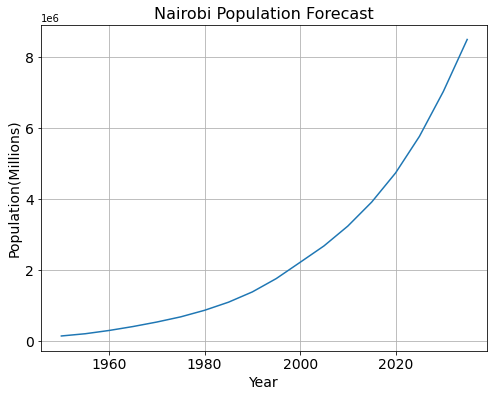

In [39]:
plt.figure(figsize=[8,6])
plt.plot('Year','Population', data=population_forecast)
plt.grid()
plt.title('Nairobi Population Forecast', fontsize=16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Population(Millions)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [40]:
gender_dist = pd.read_csv('Population_by_gender.csv', names=['Gender(2019)','Population'], header=0)
age_dist = pd.read_csv('2019_Age_Distribution.csv', names = ['Age Distribution (2019)', 'Population'], header=0)

#### Gender Distribution

In [41]:
gender_dist

,Gender(2019),Population
0,Males,"2,192,452"
1,Females,"2,204,376"
2,Intersex,245


### Age Distribution

In [42]:
age_dist.head(3)

,Age Distribution (2019),Population
0,0-9 years,"957,699"
1,10-19 years,"730,403"
2,20-29 years,"1,146,567"


In [43]:
age_dist['Population'] = age_dist['Population'].str.replace(',','')
age_dist['Population'] = age_dist['Population'].astype(int)

In [44]:
print(age_dist.dtypes)
age_dist.head(4)

Age Distribution (2019)    object
Population                  int32
dtype: object


,Age Distribution (2019),Population
0,0-9 years,957699
1,10-19 years,730403
2,20-29 years,1146567
3,30-39 years,841266
4,40-49 years,428094


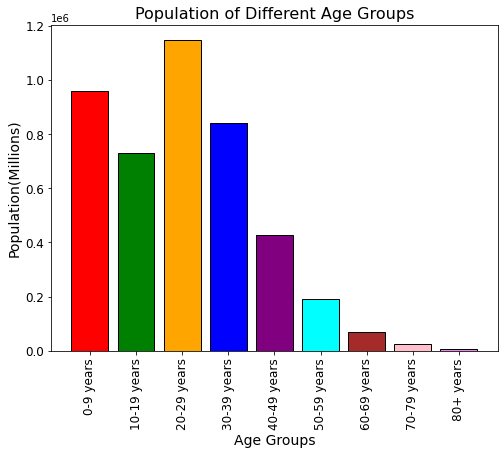

In [45]:
plt.figure(figsize=[8,6])
colours = ['red','green','orange','blue','purple','cyan','brown','pink','violet']
plt.bar(age_dist['Age Distribution (2019)'],age_dist['Population'], color= colours, edgecolor='Black')
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
plt.title('Population of Different Age Groups', fontsize=16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Population(Millions)', fontsize=14)
plt.show()

### Using Foursquare's API to get nearby venues within a 500m radius of each neighbourhood

In [1]:
CLIENT_ID = 'REMOVED FOR PRIVACY'
CLIENT_SECRET = 'REMOVED FOR PRIVACY' 
VERSION = '20180605'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: REMOVED FOR PRIVACY
CLIENT_SECRET:REMOVED FOR PRIVACY


In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
nairobi_venues = getNearbyVenues(names=data_filt['Neighborhood'], latitudes=data_filt['latitude'], longitudes=data_filt['longitude'])

Bahati, Nairobi
Buruburu
Dagoretti
Dandora,Kenya
Eastleigh, Nairobi
Embakasi
Gatwekera
Gigiri
Githurai
Jericho, Nairobi
Kambi Muru
Kamulu
Kangemi
Karen, Kenya
Kariobangi
Kasarani
Kawangware
Kibera,Kenya
Kichinjio
Kilimani,Kenya
Kisumu Ndogo
Kitisuru
Korogocho
Laini Saba
Lang'ata
Lavington, Nairobi
Lindi, Nairobi
Lucky Summer,Kenya
Madaraka Estate
Majengo, Nairobi
Makongeni
Mashimoni
Mathare
Mathare Valley
Matopeni
Mugumoini
Ofafa
Pangani, Nairobi
Parklands, Nairobi
Pumwani
Raila,Kenya
Runda
Sarang'ombe
Siranga,Kenya
South B
South C,Kenya
Soweto East
Soweto West
Syokimau
Uthiru
Westlands, Nairobi


In [52]:
print(nairobi_venues.shape)

(239, 7)


In [53]:
nairobi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Dagoretti,1,1,1,1,1,1
"Eastleigh, Nairobi",6,6,6,6,6,6
Embakasi,4,4,4,4,4,4
Gigiri,19,19,19,19,19,19
Githurai,5,5,5,5,5,5
"Jericho, Nairobi",2,2,2,2,2,2
Kambi Muru,1,1,1,1,1,1
Kangemi,5,5,5,5,5,5
"Karen, Kenya",4,4,4,4,4,4


In [54]:
len(nairobi_venues['Venue Category'].unique())

88

In [55]:
nairobi_onehot = pd.get_dummies(nairobi_venues[['Venue Category']], prefix="", prefix_sep="")
nairobi_onehot['Neighborhood'] = nairobi_venues['Neighborhood']
fixed_columns = [nairobi_onehot.columns[-1]] + list(nairobi_onehot.columns[:-1])
nairobi_onehot = nairobi_onehot[fixed_columns]
nairobi_onehot.head(3)

,Neighborhood,African Restaurant,Arcade,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Garden,Bistro,Bookstore,...,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tourist Information Center,Trail,Train Station,Video Store,Wine Bar,Women's Store,Zoo Exhibit
0,Dagoretti,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Eastleigh, Nairobi",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Eastleigh, Nairobi",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
nairobi_grp = nairobi_onehot.groupby('Neighborhood').mean().reset_index()
print(nairobi_grp.shape)
nairobi_grp.head(4)

(37, 89)


,Neighborhood,African Restaurant,Arcade,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Garden,Bistro,Bookstore,...,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tourist Information Center,Trail,Train Station,Video Store,Wine Bar,Women's Store,Zoo Exhibit
0,Dagoretti,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Eastleigh, Nairobi",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Embakasi,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Gigiri,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,...,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Finding the top five most common venues in each neighbourhood.

In [57]:
num_top_venues = 5

for neigh in nairobi_grp['Neighborhood']:
    print(f'*****{neigh.upper()}*****')
    temp = nairobi_grp[nairobi_grp['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

*****DAGORETTI*****
         venue  freq
0  Flea Market   1.0
1    Hotel Bar   0.0
2         Pool   0.0
3  Pizza Place   0.0
4     Pharmacy   0.0


*****EASTLEIGH, NAIROBI*****
               venue  freq
0              Hotel  0.33
1         Food Court  0.17
2  Electronics Store  0.17
3      Shopping Mall  0.17
4        Men's Store  0.17


*****EMBAKASI*****
                  venue  freq
0                Lounge  0.50
1     Convenience Store  0.25
2  Fast Food Restaurant  0.25
3    African Restaurant  0.00
4         Moving Target  0.00


*****GIGIRI*****
           venue  freq
0           Café  0.11
1          Hotel  0.05
2     Steakhouse  0.05
3         Lounge  0.05
4  Grocery Store  0.05


*****GITHURAI*****
                venue  freq
0         Flea Market   0.4
1       Train Station   0.2
2       Moving Target   0.2
3         Bus Station   0.2
4  African Restaurant   0.0


*****JERICHO, NAIROBI*****
            venue  freq
0  Cosmetics Shop   0.5
1  Soccer Stadium   0.5
2            

###  Creating a Data Frame of the 10 most common venues within each neighbourhood's 500m radius

In [58]:
def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append(f'{ind+1}{indicators[ind]} Most Common Venue')
    except:
        columns.append(f'{ind+1}th Most Common Venue')

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nairobi_grp['Neighborhood']

for ind in np.arange(nairobi_grp.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = most_common_venues(nairobi_grp.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dagoretti,Flea Market,Zoo Exhibit,Fast Food Restaurant,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
1,"Eastleigh, Nairobi",Hotel,Men's Store,Food Court,Shopping Mall,Electronics Store,Zoo Exhibit,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop
2,Embakasi,Lounge,Convenience Store,Fast Food Restaurant,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
3,Gigiri,Café,Frozen Yogurt Shop,Spa,Deli / Bodega,Lounge,Pool,Restaurant,Sandwich Place,Burger Joint,Ethiopian Restaurant
4,Githurai,Flea Market,Train Station,Moving Target,Bus Station,Zoo Exhibit,Ethiopian Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner


## Using the Silhouette score to find the optimal number of clusters that can be used to classify the neighbourhoods

In [60]:
clustered_nairo_grp = nairobi_grp.drop('Neighborhood', axis=1)

In [61]:
indices = []
scores = []
for clusters in range(2,15):
    kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=0).fit_predict(clustered_nairo_grp)
    
    sil_score = silhouette_score(clustered_nairo_grp,kmeans)
    
    indices.append(clusters)
    scores.append(sil_score)    

In [62]:
print(indices)
print(scores)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.38698562088460614, 0.2771036632263495, 0.2882032746738212, 0.305774191235588, 0.23163309191971695, 0.3690967131239133, 0.28421285274439334, 0.2852789750162449, 0.2863224738358982, 0.2923766975553522, 0.31547407041132225, 0.2530705480488006, 0.2950944665872631]


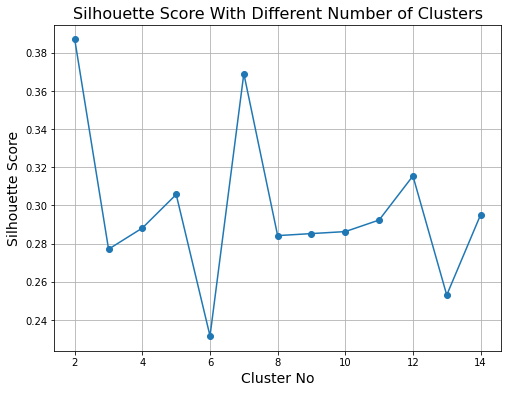

In [63]:
plt.figure(figsize=[8,6])
plt.plot(indices, scores, 'o-')
plt.title('Silhouette Score With Different Number of Clusters', fontsize = 16)
plt.xlabel('Cluster No', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid()
plt.show()

In [64]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(clustered_nairo_grp)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
nairobi_merged = data_filt
nairobi_merged = nairobi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [67]:
nairobi_merged.head(3)

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bahati, Nairobi",-1.300000,29.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Buruburu,1.766667,32.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dagoretti,-1.289693,36.684983,0.0,Flea Market,Zoo Exhibit,Fast Food Restaurant,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
3,"Dandora,Kenya",-1.249073,36.896289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Eastleigh, Nairobi",-1.277829,36.848683,0.0,Hotel,Men's Store,Food Court,Shopping Mall,Electronics Store,Zoo Exhibit,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop


##### From the table above, some neghbourhoods did not have any nearby venues within a 500m radius. I attempted using different values of  the radius that would provide , more data on common venues, but 500 metres seemed to be the most idea option. Neigbourhoods containing null values thus had to be dropped.

In [68]:
nairobi_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
Neighborhood              51 non-null object
latitude                  51 non-null float64
longitude                 51 non-null float64
Cluster Labels            37 non-null float64
1st Most Common Venue     37 non-null object
2nd Most Common Venue     37 non-null object
3rd Most Common Venue     37 non-null object
4th Most Common Venue     37 non-null object
5th Most Common Venue     37 non-null object
6th Most Common Venue     37 non-null object
7th Most Common Venue     37 non-null object
8th Most Common Venue     37 non-null object
9th Most Common Venue     37 non-null object
10th Most Common Venue    37 non-null object
dtypes: float64(3), object(11)
memory usage: 5.7+ KB


In [69]:
null_values = nairobi_merged[nairobi_merged.isnull().any(axis=1)].index
null_values

Int64Index([0, 1, 3, 6, 11, 16, 22, 26, 31, 34, 35, 39, 41, 43], dtype='int64')

In [70]:
nrb_merged_clean = nairobi_merged.drop(null_values)
nrb_merged_clean['Cluster Labels'] = nrb_merged_clean['Cluster Labels'].astype(int)
nrb_merged_clean.head(3)

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Dagoretti,-1.289693,36.684983,0,Flea Market,Zoo Exhibit,Fast Food Restaurant,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
4,"Eastleigh, Nairobi",-1.277829,36.848683,0,Hotel,Men's Store,Food Court,Shopping Mall,Electronics Store,Zoo Exhibit,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop
5,Embakasi,-1.324728,36.887724,0,Lounge,Convenience Store,Fast Food Restaurant,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store


### A visualised map of the clustered neighbourhoods of Nairobi. No. of Clusters = 2

In [71]:
kclusters = 2
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nrb_merged_clean['latitude'], nrb_merged_clean['longitude'], nrb_merged_clean['Neighborhood'], nrb_merged_clean['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster+1) +')', parse_html=True)
    map_clusters.add_child(folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

# Results and Discussion

### Clustering Nairobi’s neighbourhoods into only 2 divisions may have been based on an optimal score, however these clusters do not seem to provide sufficient information regarding common venue data that will be needed for further analysis. An extra step had to be taken by finding venues that appear often in the 1st most common venue


In [72]:
freq = nrb_merged_clean['1st Most Common Venue'].value_counts()
freq = freq.to_frame(name = 'Frequency')

In [73]:
freq.reset_index(inplace=True)

In [74]:
freq.rename(columns={'index':'Venue'}, inplace=True)

In [75]:
freq.head()

,Venue,Frequency
0,Lounge,4
1,Coffee Shop,3
2,Athletics & Sports,3
3,Hotel,3
4,Spa,2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

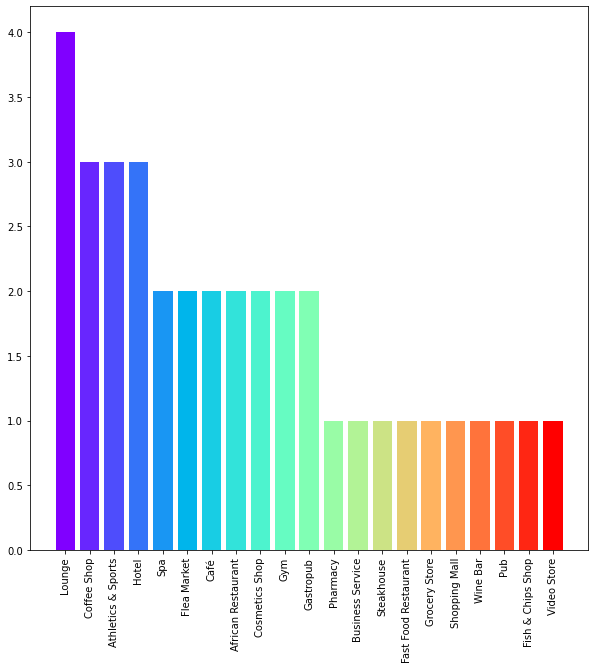

In [76]:
plt.figure(figsize=[10,10])

x = np.arange(21)
ys = [i + x + (i*x)**2 for i in range(21)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

plt.bar(freq.Venue, freq.Frequency, color = rainbow)
plt.xticks(rotation=90)

### Filtering the Data Frame based on cluster Labels

In [77]:
cluster_zero = nrb_merged_clean.loc[nrb_merged_clean['Cluster Labels'] == 0]
cluster_one = nrb_merged_clean.loc[nrb_merged_clean['Cluster Labels'] == 1]

## First Cluster

In [78]:
cluster_zero

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Dagoretti,-1.289693,36.684983,0,Flea Market,Zoo Exhibit,Fast Food Restaurant,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
4,"Eastleigh, Nairobi",-1.277829,36.848683,0,Hotel,Men's Store,Food Court,Shopping Mall,Electronics Store,Zoo Exhibit,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop
5,Embakasi,-1.324728,36.887724,0,Lounge,Convenience Store,Fast Food Restaurant,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
7,Gigiri,-1.232503,36.807295,0,Café,Frozen Yogurt Shop,Spa,Deli / Bodega,Lounge,Pool,Restaurant,Sandwich Place,Burger Joint,Ethiopian Restaurant
8,Githurai,-1.202836,36.916862,0,Flea Market,Train Station,Moving Target,Bus Station,Zoo Exhibit,Ethiopian Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner
9,"Jericho, Nairobi",-1.290680,36.868618,0,Cosmetics Shop,Soccer Stadium,Convenience Store,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
12,Kangemi,-1.265426,36.752518,0,Video Store,African Restaurant,Bakery,Bus Station,Fast Food Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant
13,"Karen, Kenya",-1.328375,36.704968,0,Spa,Furniture / Home Store,Mountain,Shopping Mall,Zoo Exhibit,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner
14,Kariobangi,-1.249992,36.883294,0,Business Service,Light Rail Station,Zoo Exhibit,Fast Food Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
15,Kasarani,-1.220872,36.901222,0,Grocery Store,Bar,African Restaurant,Lounge,Hotel,Pub,Food & Drink Shop,Restaurant,Steakhouse,Sculpture Garden


### Second Cluster

In [79]:
cluster_one

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Kambi Muru,-1.311913,36.788393,1,Athletics & Sports,Zoo Exhibit,Fish & Chips Shop,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
18,Kichinjio,-1.308073,36.790079,1,Athletics & Sports,Zoo Exhibit,Fish & Chips Shop,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
20,Kisumu Ndogo,-1.313671,36.786568,1,Athletics & Sports,Zoo Exhibit,Fish & Chips Shop,Deli / Bodega,Department Store,Dessert Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant


##### To furhter emphasise on the fact that segmenting the neighburhoods through only 2 clusters is not beneficial enough for analysing, we can see that the three neighbourhoods in the second cluster all had the same kind of common venues. This would be possibly due to the fact that these neighbourhoods are close to each other, and therefore share the same venues withing their 500 metre radii.

##### Two specific Venues, - ‘Athletics & Sports’ and ‘Gym’ – have a summed appearance of 7 times as common venues in the 1st most common venue (from the bar chart). 

# Conclusion

### With our core objective being able to create more jobs for the youth, as well as trying to divert spending habits to the younger generation (both dependants and independent individuals), an effective way of achieving this desired goal is by creating retail business shops which sell sportswear to appeal both male and female individuals who are in their teenage years, up until those who are in their late youth.
